In [1]:
import matplotlib.pyplot as plt

In [2]:
%run .\import.ipynb

# Import common funcs/libs for DS4420

# imports
import os
import numpy as np
import pandas as pd

# funcs / constants
SOURCE_FOLDER = ''
listAssets(suffix=False)



In [3]:
SOURCE_FOLDER = "project"

In [4]:
listAssets()

['C:\\Users\\Overl\\DS4420\\assets\\project\\2025-01_HRTravelTimes.csv',
 'C:\\Users\\Overl\\DS4420\\assets\\project\\2025-01_LRTravelTimes.csv',
 'C:\\Users\\Overl\\DS4420\\assets\\project\\2025-02_HRTravelTimes.csv',
 'C:\\Users\\Overl\\DS4420\\assets\\project\\2025-02_LRTravelTimes.csv',
 'C:\\Users\\Overl\\DS4420\\assets\\project\\2025-03_HRTravelTimes.csv',
 'C:\\Users\\Overl\\DS4420\\assets\\project\\2025-03_LRTravelTimes.csv']

In [5]:
ht1 = pd.read_csv(listAssets()[0],low_memory=False)

In [6]:
ht1 = ht1[ht1["from_stop_name"] == "Ruggles"]

In [7]:
ht1 = ht1[ht1["to_stop_name"] == "Downtown Crossing"]

In [55]:
rtd_secs = ht1.loc[:,["from_stop_departure_datetime","travel_time_sec"]]
rtd_secs.rename(columns={'from_stop_departure_datetime': 'from_time'}, inplace=True)
rtd_secs

,from_time,travel_time_sec
34934,2025-01-01T07:37:13Z,437
35124,2025-01-01T09:05:05Z,628
35314,2025-01-01T10:37:03Z,550
35504,2025-01-01T12:03:11Z,478
35694,2025-01-01T13:34:17Z,512
...,...,...
3874652,2025-01-31T23:49:38Z,464
3874743,2025-02-01T00:01:17Z,458
3874834,2025-02-01T00:14:57Z,501
3874925,2025-02-01T00:28:43Z,470


In [33]:
rtd_secs

,from_stop_departure_datetime,travel_time_sec
34934,2025-01-01T07:37:13Z,437
35124,2025-01-01T09:05:05Z,628
35314,2025-01-01T10:37:03Z,550
35504,2025-01-01T12:03:11Z,478
35694,2025-01-01T13:34:17Z,512
...,...,...
3874652,2025-01-31T23:49:38Z,464
3874743,2025-02-01T00:01:17Z,458
3874834,2025-02-01T00:14:57Z,501
3874925,2025-02-01T00:28:43Z,470


In [38]:
np.max(rtd_secs["travel_time_sec"])

3641

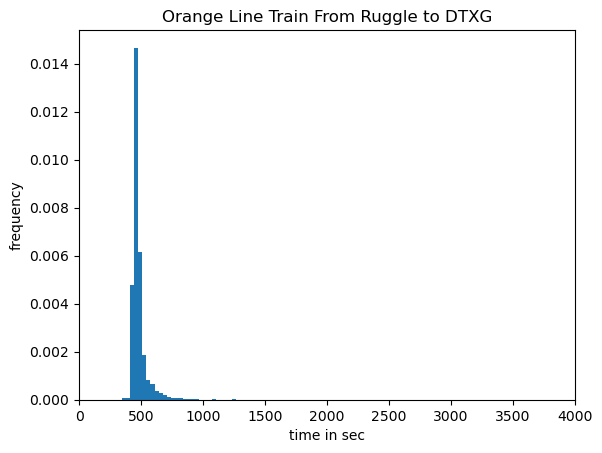

In [40]:
plt.hist(rtd_secs["travel_time_sec"],bins=100,density=True)
plt.xlabel("time in sec")
plt.ylabel("frequency")
plt.xlim(0,4000)
plt.title("Orange Line Train From Ruggle to DTXG")
plt.show()

In [46]:
rtd_secs.to_csv("ruggles2dtxg.csv",index=False)

In [49]:
pd.read_csv("ruggles2dtxg.csv")

,from_stop_departure_datetime,travel_time_sec
0,2025-01-01T07:37:13Z,437
1,2025-01-01T09:05:05Z,628
2,2025-01-01T10:37:03Z,550
3,2025-01-01T12:03:11Z,478
4,2025-01-01T13:34:17Z,512
...,...,...
4651,2025-01-31T23:49:38Z,464
4652,2025-02-01T00:01:17Z,458
4653,2025-02-01T00:14:57Z,501
4654,2025-02-01T00:28:43Z,470
